<>:12: SyntaxWarning: invalid escape sequence '\I'
<>:12: SyntaxWarning: invalid escape sequence '\I'
C:\Users\janna\AppData\Local\Temp\ipykernel_21768\1713613620.py:12: SyntaxWarning: invalid escape sequence '\I'
  df_raw = pd.read_csv("data\ImmGenATAC18_AllOCRsInfo.csv", header=0, quotechar='"', low_memory=False)


13. **Can one define different classes of peaks based on the signal and its variation across cells?**
                                                    NK.27+11b-.BM  \
(ImmGenATAC1219.peak_1, chr1, 3020786, 0.0, 0.5...           0.82   
(ImmGenATAC1219.peak_2, chr1, 3087226, 0.0, 0.5...           1.46   
(ImmGenATAC1219.peak_3, chr1, 3120109, 0.07, 10...           0.20   
(ImmGenATAC1219.peak_4, chr1, 3121485, 0.15, 3....           1.72   
(ImmGenATAC1219.peak_5, chr1, 3372787, 0.03, 1....           0.20   
(ImmGenATAC1219.peak_6, chr1, 3399217, 0.06, 2....           1.46   
(ImmGenATAC1219.peak_7, chr1, 3400115, 0.44, 2....           0.82   
(ImmGenATAC1219.peak_8, chr1, 3416260, 0.01, 2....           1.10   
(ImmGenATAC1219.peak_9, chr1, 3434092, 0.18, 1....           2.68   
(ImmGenATAC1219.peak_10, chr1, 3434378, 0.15, 1...           1.72   

                                                    NK.27+11b+.BM  \
(ImmGenATAC1219.peak_1, chr1, 3020786, 0.0, 0.5...           0.22   


Exception in thread Thread-4 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\janna\miniconda3\envs\data_analysis\Lib\threading.py", line 1041, in _bootstrap_inner
    self.run()
    ~~~~~~~~^^
  File "c:\Users\janna\miniconda3\envs\data_analysis\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
    ~~~~~~~~~~~~~~~~~~~~~^^^^^^
  File "c:\Users\janna\miniconda3\envs\data_analysis\Lib\threading.py", line 992, in run
    self._target(*self._args, **self._kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\janna\miniconda3\envs\data_analysis\Lib\subprocess.py", line 1612, in _readerthread
    buffer.append(fh.read())
                  ~~~~~~~^^
  File "<frozen codecs>", line 325, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 109: invalid start byte


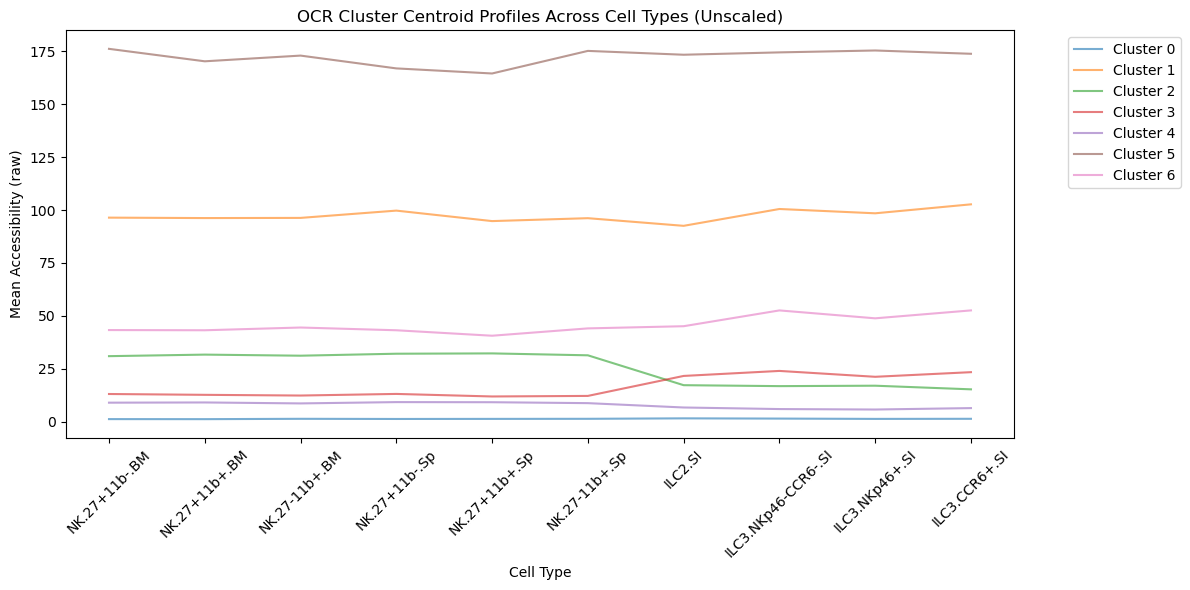

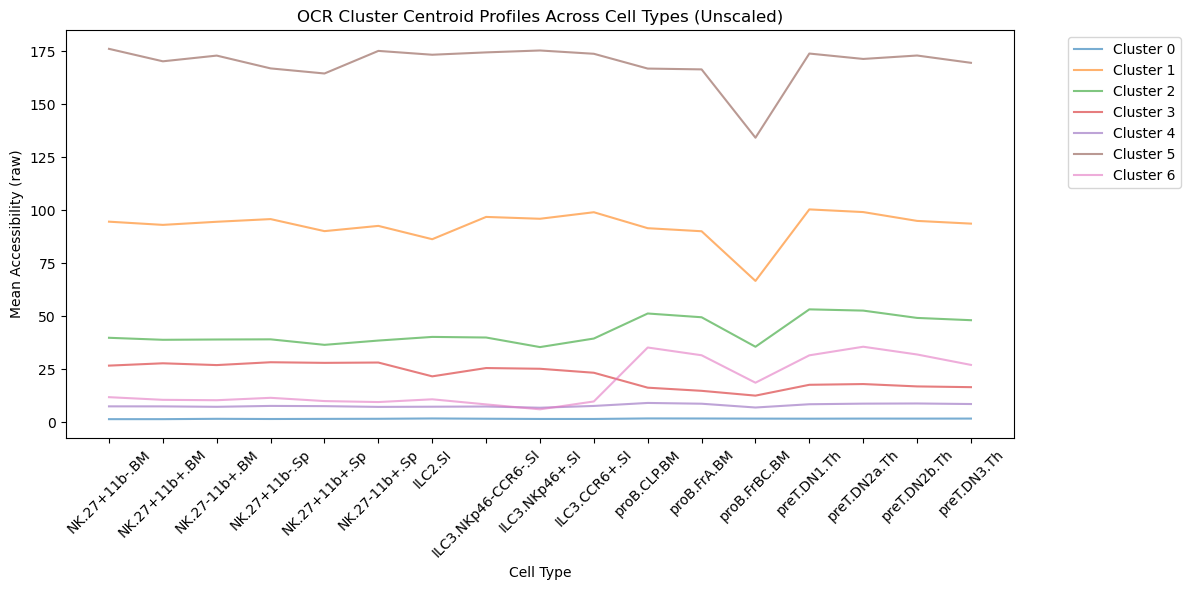

In [1]:
print("13. **Can one define different classes of peaks based on the signal and its variation across cells?**")

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df_raw = pd.read_csv("data\ImmGenATAC18_AllOCRsInfo.csv", header=0, quotechar='"', low_memory=False)

# Extract only the columns for NK and ILC. Only 5000 samples
df_expr = df_raw[['NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp',
       'NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI',
       'ILC3.NKp46+.SI', 'ILC3.CCR6+.SI']]
df_expr = df_expr.iloc[:5000, :]
df_expr.index = df_raw.iloc[:5000, :] 

print(df_expr[:10])

#KMeans clustering
from sklearn.cluster import KMeans

k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
df_expr['Cluster'] = kmeans.fit_predict(df_expr)

cluster_means = df_expr.groupby('Cluster').mean()

# cluster means
cluster_profiles = df_expr.groupby('Cluster').mean()
# plotting the centroid profile
plt.figure(figsize=(12, 6))
for i, row in cluster_profiles.iterrows():
    plt.plot(row.index, row.values, label=f'Cluster {i}', alpha=0.6)

plt.xlabel("Cell Type")
plt.ylabel("Mean Accessibility (raw)")
plt.title("OCR Cluster Centroid Profiles Across Cell Types (Unscaled)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

#the same but now compared to pro B-Cells and Pre T-Cells
df_expr2 = df_raw[['NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp',
       'NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI',
       'ILC3.NKp46+.SI', 'ILC3.CCR6+.SI', 'proB.CLP.BM','proB.FrA.BM','proB.FrBC.BM', 'preT.DN1.Th','preT.DN2a.Th', 'preT.DN2b.Th','preT.DN3.Th']]
df_expr2 = df_expr2.iloc[:5000, :]
df_expr2.index = df_raw.iloc[:5000, :] 
#kmeans
k = 7
kmeans2 = KMeans(n_clusters=k, random_state=42)
df_expr2['Cluster'] = kmeans2.fit_predict(df_expr2)

cluster_means2 = df_expr2.groupby('Cluster').mean()
# cluster means for each cell type
cluster_profiles2 = df_expr2.groupby('Cluster').mean()

# centroid profile for each cluster
plt.figure(figsize=(12, 6))
for i, row in cluster_profiles2.iterrows():
    plt.plot(row.index, row.values, label=f'Cluster {i}', alpha=0.6)

plt.xlabel("Cell Type")
plt.ylabel("Mean Accessibility (raw)")
plt.title("OCR Cluster Centroid Profiles Across Cell Types (Unscaled)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

To determine further, if we can define different classes of peaks according to their signal variation, we select a subset of 5000 OCRs, focusing only on natural killer and innate lymphoid cell types. K-means clustering was applied with k=7, and the resulting clusters were visualized by plotting their centroid profiles, which reflect the average accessibility per cell type in each cluster. These profiles show that some OCR clusters are highly active in specific ILC3 or NK subsets, while others show broader or less distinctive accessibility patterns. This indicates that it is indeed possible to define classes of peaks based on their signal levels and variation across closely related cell types.

In the second part of the code, additional unrelated lineages—Pro-B and Pre-T cell types—were included to test whether the previously observed cluster specificity still holds. The results show that several clusters retain their high activity in NK and ILC cells and remain inactive in the new lineages, while other clusters exhibit broader accessibility patterns across all lineages. This supports the idea that some clusters contain lineage-specific CREs, while others may correspond to more general regulatory elements. 